In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('data/dados_tratados.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Q1                                     4836 non-null   float64
 1   Q2                                     4836 non-null   float64
 2   Q3                                     4836 non-null   float64
 3   Q4                                     4836 non-null   float64
 4   Q5                                     4836 non-null   float64
 5   Q6                                     4836 non-null   float64
 6   Q7                                     4836 non-null   float64
 7   Q8                                     4836 non-null   float64
 8   Q9                                     4836 non-null   float64
 9   genero                                 5334 non-null   int64  
 10  idade                                  5334 non-null   int64  
 11  raca

## Análise exploratória

### Identificar corretamente quais variáveis são qualitativas e quais são quantitativas <br>
  - Qualitativas: genero, raça, escolaridade <br>
  - Quantitativas: Q [1-9], idade, renda_anual_familiar, tempo_atividade_semanal_pag, aderencia_pag, total_[vegetais-acucar], score_saude. <br>

### Para medidas quantitativas, podemos usar medidas de posição e dispersão e para gráficos como histogramas ou de densidade


#### Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:

In [105]:
print('Pouco interesse ou pouco prazer em fazer as coisas: ')
print(f'Nenhuma vez - {(df.Q1.value_counts(normalize=True).round(4) * 100)[0]} %')
print(f'Menos de uma semana - {(df.Q1.value_counts(normalize=True).round(4) * 100)[1]} %')
print(f'Uma semana ou mais - {(df.Q1.value_counts(normalize=True).round(4) * 100)[2]} %')
print(f'Quase todos os dias - {(df.Q1.value_counts(normalize=True).round(4) * 100)[3]} %')
print(f'Não soube responder - {(df.Q1.value_counts(normalize=True).round(4) * 100)[9]} %')

Pouco interesse ou pouco prazer em fazer as coisas: 
Nenhuma vez - 79.61 %
Menos de uma semana - 13.919999999999998 %
Uma semana ou mais - 3.7199999999999998 %
Quase todos os dias - 2.56 %
Não soube responder - 0.19 %


In [120]:
df.Q1.value_counts(normalize=True).round(4) * 100

0.0    79.61
1.0    13.92
2.0     3.72
3.0     2.56
9.0     0.19
Name: Q1, dtype: float64

In [107]:
print('Se sentiu para baixo, deprimido(a) ou sem perspectiva')
df.Q2.value_counts(normalize=True).round(4) * 100

Se sentiu para baixo, deprimido(a) ou sem perspectiva


0.0    77.94
1.0    15.90
2.0     3.70
3.0     2.36
9.0     0.10
Name: Q2, dtype: float64

In [108]:
print('Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume')
df.Q3.value_counts(normalize=True).round(4) * 100

Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume


0.0    65.18
1.0    22.15
3.0     6.62
2.0     5.91
9.0     0.14
Name: Q3, dtype: float64

In [109]:
print('Se sentiu cansado(a) ou com pouca energia')
df.Q4.value_counts(normalize=True).round(4) * 100

Se sentiu cansado(a) ou com pouca energia


0.0    50.23
1.0    35.28
2.0     7.65
3.0     6.74
9.0     0.10
Name: Q4, dtype: float64

In [110]:
print('Falta de apetite ou comeu demais')
df.Q5.value_counts(normalize=True).round(4) * 100

Falta de apetite ou comeu demais


0.0    78.85
1.0    14.29
3.0     3.47
2.0     3.31
9.0     0.08
Name: Q5, dtype: float64

In [111]:
print('Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)')
df.Q6.value_counts(normalize=True).round(4) * 100

Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)


0.0    85.48
1.0    10.61
2.0     1.96
3.0     1.84
9.0     0.10
Name: Q6, dtype: float64

In [112]:
print('Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)')
df.Q7.value_counts(normalize=True).round(4) * 100

Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)


0.0    84.16
1.0    11.27
2.0     2.44
3.0     2.05
9.0     0.08
Name: Q7, dtype: float64

In [114]:
print('Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, \nesteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume')
df.Q8.value_counts(normalize=True).round(4) * 100

Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, 
esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume


0.0    90.20
1.0     7.05
2.0     1.63
3.0     0.93
9.0     0.19
Name: Q8, dtype: float64

In [115]:
print('Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)')
df.Q9.value_counts(normalize=True).round(4) * 100

Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)


0.0    96.51
1.0     2.52
2.0     0.66
3.0     0.27
9.0     0.04
Name: Q9, dtype: float64

In [32]:
print(f'Porcentagem de mulheres: {(df.genero.value_counts(normalize=True)[2] * 100).round(2)} %')
print(f'Porcentagem de homens: {(df.genero.value_counts(normalize=True)[1] * 100).round(2)} %')

Porcentagem de mulheres: 51.99 %
Porcentagem de homens: 48.01 %


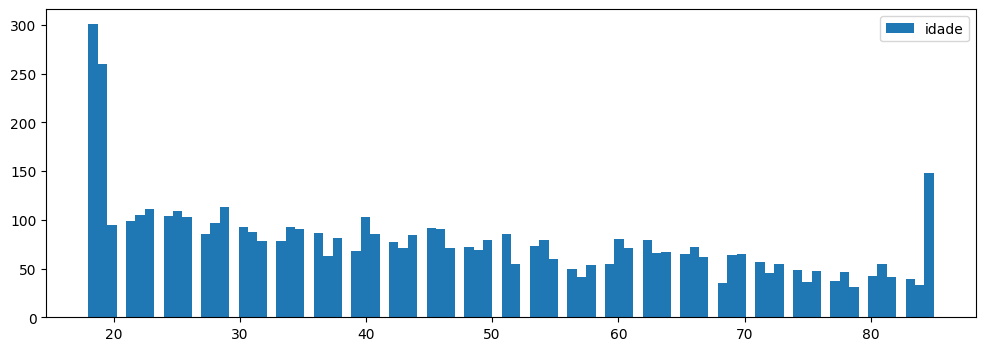

In [33]:
df.idade.hist(grid=False, bins=90, legend=True, figsize=(12, 4));